In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 9999)
import matplotlib.pyplot as plt

In [2]:
#import the files
xls = pd.ExcelFile("../Data/IBM Sales Enablement Data Analyst Case Study Interview.xlsx")
livesend_by_date = pd.read_excel(xls, 2)
livesend_by_seller = pd.read_excel(xls, 3)
livesend_by_content = pd.read_excel(xls, 4)

In [3]:
#Calculate the open rate for livesend by date
livesend_by_date['LIVESEND_DATE'] = pd.to_datetime(livesend_by_date['LIVESEND_DATE'])
livesend_by_date = livesend_by_date.groupby(pd.Grouper(key='LIVESEND_DATE',freq='M'))['TOTAL_LIVESENDS','TOTAL_CLIENT_OPENS'].sum().reset_index()
livesend_by_date["OPEN_RATE"]=round((livesend_by_date["TOTAL_CLIENT_OPENS"]/livesend_by_date["TOTAL_LIVESENDS"])*100,2)
livesend_by_date["LIVESEND_DATE"]= pd.to_datetime(livesend_by_date["LIVESEND_DATE"]).dt.date
livesend_by_date

,LIVESEND_DATE,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE
0,2020-01-31,91,43,47.25
1,2020-02-29,269,133,49.44
2,2020-03-31,2388,197,8.25
3,2020-04-30,9801,1217,12.42
4,2020-05-31,4291,646,15.05
5,2020-06-30,3400,200,5.88
6,2020-07-31,7556,382,5.06
7,2020-08-31,4730,618,13.07
8,2020-09-30,7719,552,7.15


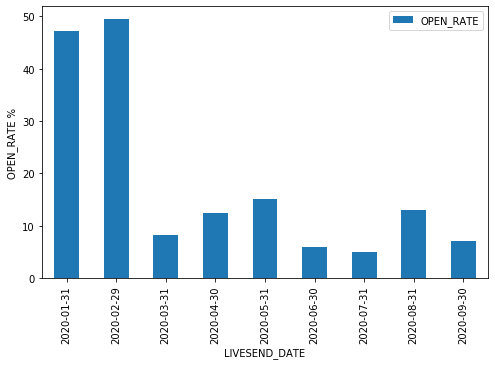

In [4]:
ax=livesend_by_date.plot.bar(x='LIVESEND_DATE',y='OPEN_RATE',figsize=(8,5))
ax.set_ylabel("OPEN_RATE %")
plt.savefig('OPEN_RATE_BY_DATE.png', dpi=300)

In [5]:
#Calculate the open rate for livesend by seller
livesend_by_seller["OPEN RATE"]=round((livesend_by_seller["TOTAL_CLIENT_OPENS"]/livesend_by_seller["TOTAL_LIVESENDS"])*100,2)
livesend_by_seller_mod=livesend_by_seller[['SELLER_ID','TOTAL_LIVESENDS','TOTAL_CLIENT_OPENS','OPEN RATE']]
livesend_by_seller_mod=livesend_by_seller_mod.sort_values("TOTAL_LIVESENDS",ascending=False)
median = livesend_by_seller_mod['TOTAL_LIVESENDS'].median()
mean = round(livesend_by_seller_mod['TOTAL_LIVESENDS'].mean(),2)
#livesend_by_seller_mod.to_csv('livesend_by_seller_mod.csv',index=False,)
livesend_by_seller_mod.head()

,SELLER_ID,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN RATE
358,1f1cbc4f-1ed3-4767-b573-c265de03e37a,3126,18,0.58
864,c9304d02-fda5-49fb-bae8-395d25300f7e,2885,4,0.14
21,67e0e6e0-ba6d-4d38-8a0e-680bfef37d35,2380,49,2.06
27,3ec24363-7e36-4654-8845-765f60e265ca,937,21,2.24
981,509dd3b9-ecfa-4ca1-86fc-fbb8ad6c81b5,830,0,0.00


In [6]:
#Calculate the open rate for livesend by content
livesend_by_content["OPEN RATE"]=round((livesend_by_content["TOTAL_CLIENT_OPENS"]/livesend_by_content["TOTAL_LIVESENDS"])*100,2)
livesend_by_content_mod=livesend_by_content[['SEISMIC_DOC_ID','SEISMIC_DOC_NAME','TOTAL_LIVESENDS','TOTAL_CLIENT_OPENS','OPEN RATE','CONTENT_TYPE']]
livesend_by_content_mod=livesend_by_content_mod.sort_values("TOTAL_LIVESENDS",ascending=True)
median=livesend_by_content_mod['TOTAL_LIVESENDS'].median()
mean=livesend_by_content_mod['TOTAL_LIVESENDS'].mean()
#livesend_by_content_mod.to_csv('livesend_by_content_mod.csv',index=False,)
livesend_by_content_mod.head()

,SEISMIC_DOC_ID,SEISMIC_DOC_NAME,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN RATE,CONTENT_TYPE
0,216e15bb-f055-4159-9e24-a666bfef7621,Tape Portfolio Executive Overview Client Prese...,1,0,0.0,Client Presentation
693,bdc2a966-7499-4c41-ac6b-18eec31a3065,Public Cloud Invitation,1,1,100.0,Event
694,a481d1d6-3597-430b-b3bb-23d1efeb62b9,Think 2020 Intro Slide,1,1,100.0,Client Presentation
696,a98552c8-1afa-4868-96ff-262df8d4c233,Whats New in Content and Capture - 1H2020,1,1,100.0,News
697,6922a5ce-547d-4aef-93a3-9a5eb8eac03f,Press Release: OrbitalRX and Micromedex,1,1,100.0,Announcement


In [7]:
#Calculate the open rate for livesend by content type
livesend_by_content_mod_tl=livesend_by_content_mod.groupby(by="CONTENT_TYPE")['TOTAL_LIVESENDS'].sum().reset_index()
livesend_by_content_mod_op=livesend_by_content_mod.groupby(by="CONTENT_TYPE")['TOTAL_CLIENT_OPENS'].sum().reset_index()
livesend_by_content_mod_tl_df=pd.DataFrame(data=livesend_by_content_mod_tl)
livesend_by_content_mod_op_df=pd.DataFrame(data=livesend_by_content_mod_op)
livesend_by_content_type_merged=pd.merge(left=livesend_by_content_mod_tl_df, 
                                                  right=livesend_by_content_mod_op_df,
                                                  on='CONTENT_TYPE')
livesend_by_content_type_merged["OPEN_RATE"]=round((livesend_by_content_type_merged["TOTAL_CLIENT_OPENS"]/livesend_by_content_type_merged["TOTAL_LIVESENDS"])*100,2)
livesend_by_content_type_merged=livesend_by_content_type_merged.sort_values("OPEN_RATE", ascending=False,ignore_index=True)
#livesend_by_content_type_merged.to_csv('livesend_by_content_type.csv',index=False,)
livesend_by_content_type_merged.head()

,CONTENT_TYPE,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE
0,<NULL>,1,1,100.00
1,FAQ,2,2,100.00
2,Code Patterns,3,3,100.00
3,Sales Kit,9,8,88.89
4,Pricing,9,6,66.67


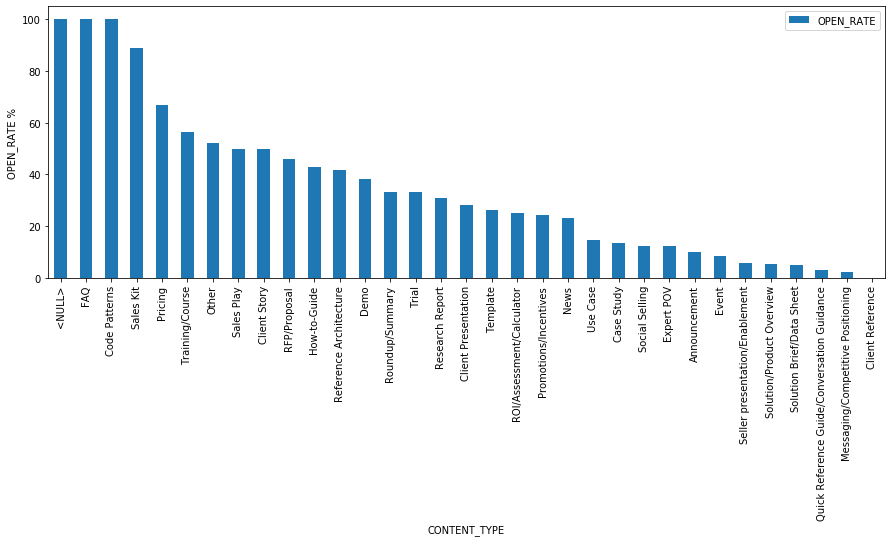

In [8]:
#ax = plt.figure(figsize=(8,8))
ax=livesend_by_content_type_merged.plot.bar(x='CONTENT_TYPE',y='OPEN_RATE',figsize=(15,5))
ax.set_ylabel("OPEN_RATE %")
plt.savefig('OPEN_RATE_BY_CONTENT_TYPE.png', dpi=300)

In [9]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [10]:
engine = create_engine("sqlite:///../seismic_openrate_analysis.sqlite")
conn = engine.connect()

In [11]:
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

[]

In [16]:
indepth_seller_group = pd.read_sql("SELECT sop.SELLER_ID,sop.TOTAL_LIVESENDS,sop.TOTAL_CLIENT_OPENS,sop.OPEN_RATE, s.SELLER_GROUP,s.SELLER_SUBGROUP FROM livesend_by_seller AS s INNER JOIN livesend_by_seller_openrate AS sop ON s.SELLER_ID=sop.SELLER_ID WHERE sop.OPEN_RATE>10.0 AND sop.TOTAL_LIVESENDS>16", conn)
indepth_seller_group=indepth_seller_group.groupby("SELLER_GROUP")
indepth_seller_group.count().reset_index()

,SELLER_GROUP,SELLER_ID,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE,SELLER_SUBGROUP
0,Cld&DataPltfrm,8,8,8,8,8
1,Cloud,1,1,1,1,1
2,GBS,4,4,4,4,4
3,GLMKT,29,29,29,29,29
4,GTS,2,2,2,2,2
5,SYS,16,16,16,16,16
6,Security,1,1,1,1,1
7,Watson Health,4,4,4,4,4


In [20]:
indepth_seller = pd.read_sql("SELECT SELLER_ID, TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE FROM livesend_by_seller_openrate WHERE OPEN_RATE>10 AND TOTAL_LIVESENDS>16", conn)
indepth_seller.groupby("SELLER_ID").count().reset_index().head()

,SELLER_ID,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE
0,08e370fb-808b-4ca4-9b55-2c9609638adb,1,1,1
1,09902014-224f-4556-9f12-496698047eb3,1,1,1
2,0a8aacdc-52a2-4797-a95a-1236a5b0ff7f,1,1,1
3,0b1cf15c-e38e-44e5-ba1f-889677fe02f3,1,1,1
4,0ff1781a-4783-4268-8172-c7d28ce377f0,1,1,1


In [14]:
indepth_content = pd.read_sql("SELECT DOC_NAME, TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE FROM livesend_by_content_openrate WHERE OPEN_RATE>10.0 AND TOTAL_LIVESENDS>20", conn)
indepth_content.head()
#indepth_content.to_csv("livesend_by_content.csv", index=False)

,DOC_NAME,TOTAL_LIVESENDS,TOTAL_CLIENT_OPENS,OPEN_RATE
0,FLYER template 2020 - English_2020-Sep-22,59,21,35.59
1,Invitación Semana de la Ciberseguridad 2020,29,7,24.14
2,Think general client invite,67,17,25.37
3,IBM IT Infrastructure at Think2020 Brochure - ...,87,22,25.29
4,Power Systems Briefing - IBM Hybrid Cloud Invi...,36,8,22.22
